# Hepatitis C virus - Blood based Detection

## About the Dataset

615 cases of laboratory values of blood donors and Hepatitis C patients and demographic values like age.

Data Set Characteristics: Multivariate
Number of Attributes: 13

## The goal:

The goal is to predict if a patient is healthy (hepatitis negative) or if the patient has hepatitis (hepatitis positive) based on the laboratory data.

## Steps:

1. Check relationships between data using graphical tools;

2. Define and fix the training and testing sets;

3. Vary the ANN parameters and evaluate the error in the training and test sets;

4. Evaluate the impact of the changes made to the parameters, in the previous step, on the performance of the ANN in the chosen problem.

## Variables:

**Category:** It represents the diagnosis or category of the individual. The possible values are:

    '0=Blood Donor': Individuals who are blood donors and do not have Hepatitis C.
    '0s=suspect Blood Donor': Individuals who are suspected to be blood donors but with some uncertainty.
    '1=Hepatitis': Individuals diagnosed with Hepatitis C.
    '2=Fibrosis': Individuals diagnosed with Hepatitis C and have progressed to fibrosis.
    '3=Cirrhosis': Individuals diagnosed with Hepatitis C and have progressed to cirrhosis.

**Age:** The age of the individuals in years.

**Sex:** The gender of the individual, m for masculine and f for feminine.

**ALB (Albumin):** Numerical value representing the level of albumin in the blood. Albumin is a protein produced by the liver and is an important indicator of liver health.

**ALP (Alkaline Phosphatase):** Numerical value representing the level of alkaline phosphatase in the blood. Alkaline phosphatase is an enzyme produced by the liver and other organs and can be an indicator of liver or bone issues.

**ALT (Alanine Aminotransferase):** Numerical value representing the level of alanine aminotransferase in the blood. ALT is an enzyme found in the liver, and elevated levels can indicate liver damage or disease.

**AST (Aspartate Aminotransferase):** Numerical value representing the level of aspartate aminotransferase in the blood. AST is an enzyme found in the liver, heart, and other tissues and can be used to assess liver and heart health.

**BIL (Bilirubin):** Numerical value representing the level of bilirubin in the blood. Bilirubin is a yellow compound produced during the normal breakdown of red blood cells and can be an indicator of liver function.

**CHE (Cholinesterase):** A numerical value representing the level of cholinesterase in the blood. Cholinesterase is an enzyme found in the liver and can be used to assess liver health.

**CHOL (Cholesterol):** A numerical value representing the level of cholesterol in the blood. Cholesterol is a fatty substance, and elevated levels can be associated with various health conditions.

**CREA (Creatinine):** A numerical value representing the level of creatinine in the blood. Creatinine is a waste product of muscle metabolism, and its levels can be used to assess kidney function.

**GGT (Gamma-Glutamyl Transferase):** A numerical value representing the level of gamma-glutamyl transferase in the blood. GGT is an enzyme found in the liver and other tissues and can be used as a marker for liver disease.

**PROT (Protein):** A numerical value representing the level of protein in the blood. Total protein levels can be influenced by various factors, including liver and kidney function.

### Importing the libraries and the dataset:

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

Here we import pandas to read the dataset, numpy to manipulate the data, matplotlib and seaborn to plot the data.

In [2]:
df = pd.read_csv('hcvdat0.csv')
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


Here we create a variable df to store the dataset and we see the first 5 rows of the dataset using the head() function.

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

Using the drop to remove the unnamed column. This column is to id the rows and is not necessary.

In [4]:
category_mapping = {
    '0=Blood Donor': 0,
    '0s=suspect Blood Donor': 1,
    '1=Hepatitis': 2,
    '2=Fibrosis': 3,
    '3=Cirrhosis': 4
}

# Map the values in the "Category" column
df['Category'] = df['Category'].map(category_mapping)

## Step 1: Check relationships between data using graphical tools;

/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


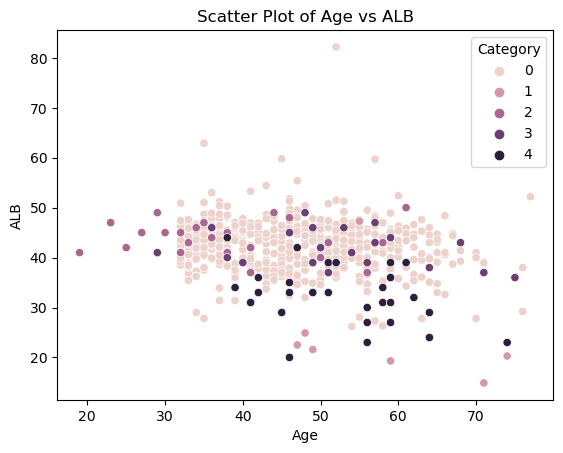

/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


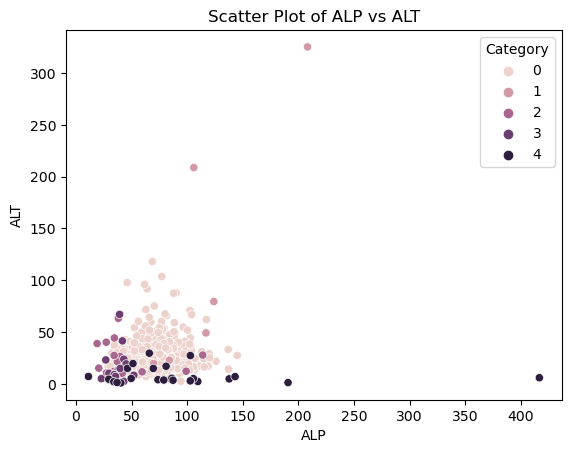

/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


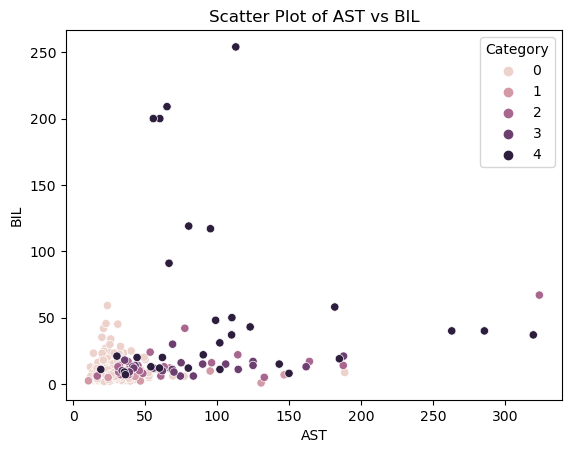

/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


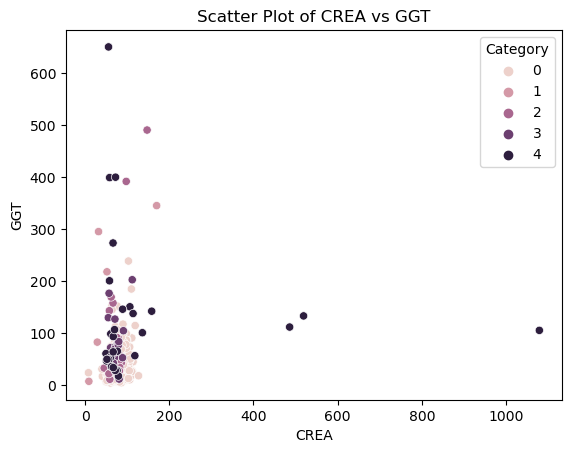

/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


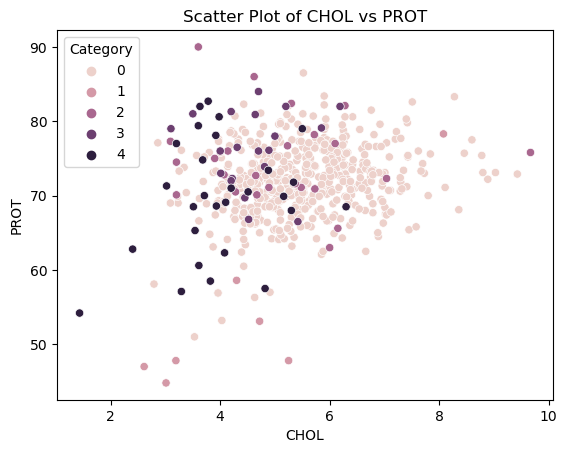

In [5]:
variable_pairs = [("Age", "ALB"), ("ALP", "ALT"), ("AST", "BIL"), ("CREA", "GGT"), ("CHOL", "PROT")]

for pair in variable_pairs:
    sns.scatterplot(data=df, x=pair[0], y=pair[1], hue="Category")
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.title(f"Scatter Plot of {pair[0]} vs {pair[1]}")
    plt.show()

All the graphs plot by loop for are a scatter plot between the variables and the category. The loop for generates 5 graphs. Lets take a look in each of them.

- First graph: Age vs ALB (Albumin)

    This graph shows in x axis the age and in y axis the albumin. The points are colored by the category. We can see that the category 0 (Blood Donor) is the most common.

- Second graph: ALP (Alkaline Phosphatase) vs ALT (Alanine Aminotransferase)

    This graph shows in x axis the ALP and in y axis the ALT. The points are colored by the category. We can see that the category 0 (Blood Donor) is the most common. We have some outliers in the category 1.

- Third graph: AST (Aspartate Aminotransferase) vs BIL (Bilirubin)

    This graph shows in x axis the AST and in y axis the BIL. The points are colored by the category. We can see that the category 0 (Blood Donor) is the most common. We have some outliers in the category 4.

- Fourth graph: CREA (Creatinine) vs GGT (Gamma-Glutamyl Transferase)

    This graph shows in x axis the CREA and in y axis the GGT. The points are colored by the category. We can see that the category 0 (Blood Donor) is the most common. We have some outliers in the category 4.

- Fifth graph: CHOL (Cholesterol) vs PROT (Protein)

    This graph shows in x axis the CHOL and in y axis the PROT. The points are colored by the category. We can see that the category 0 (Blood Donor) is the most common.

/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

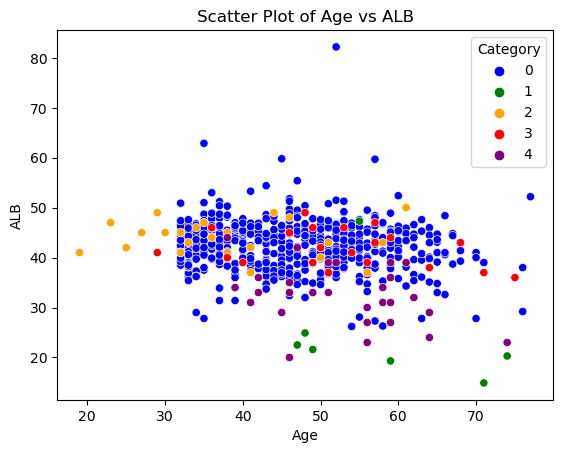

/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

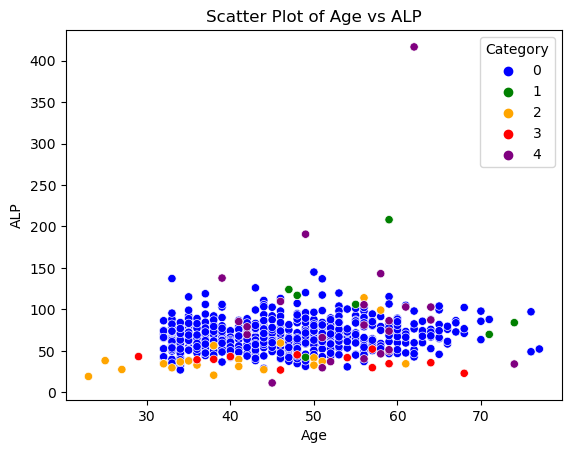

/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

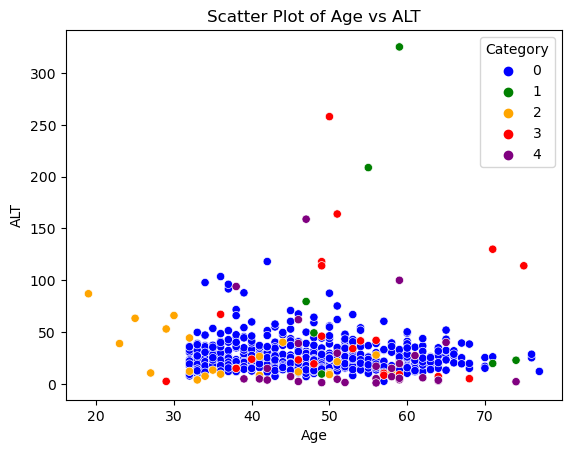

/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

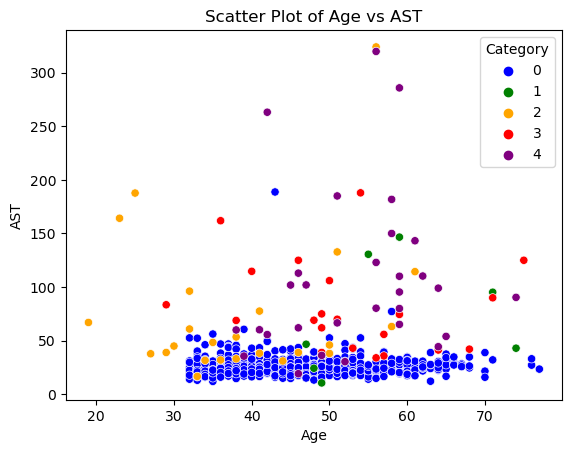

/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

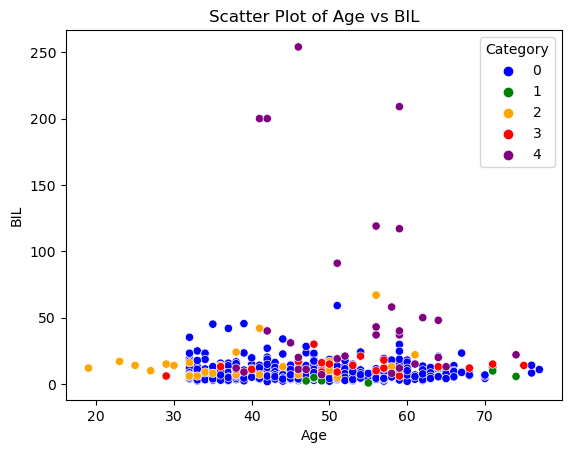

/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

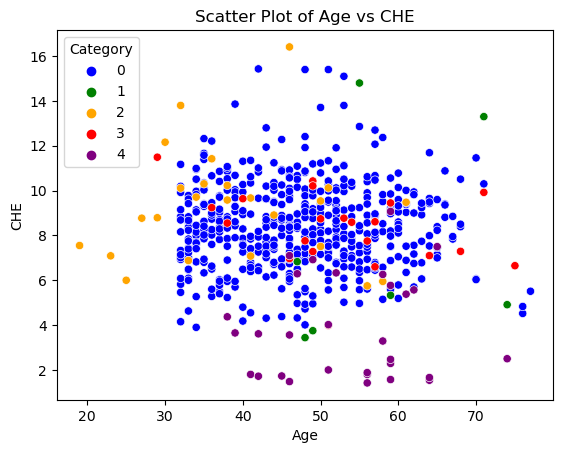

/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

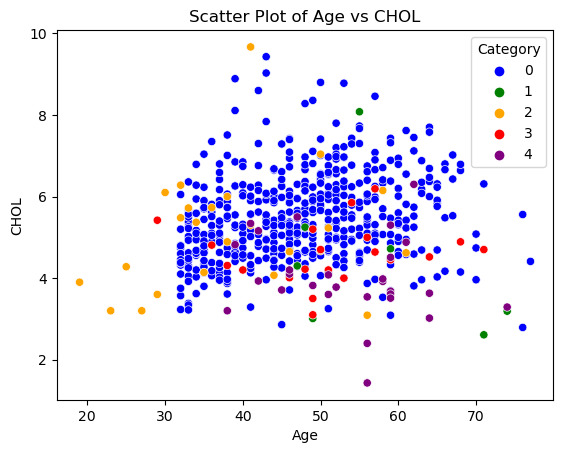

/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

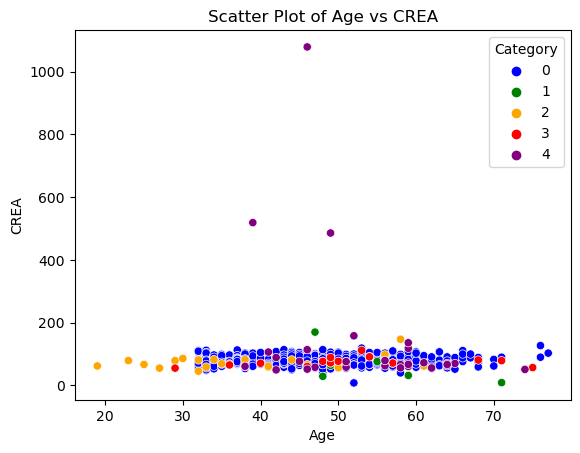

/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

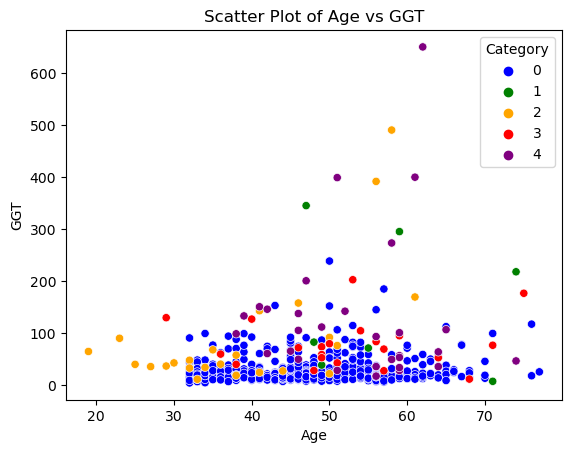

/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

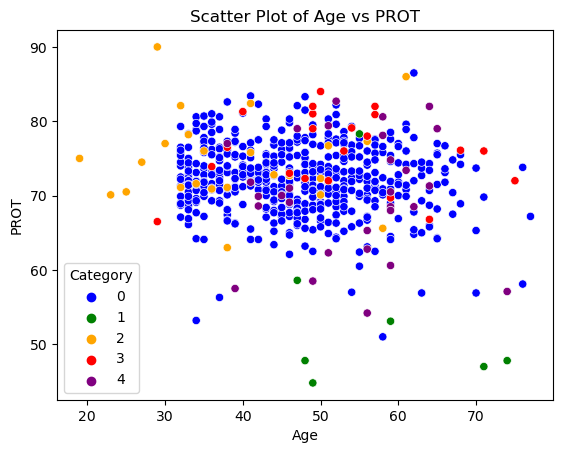

In [6]:
category_colors = {0: 'blue', 1: 'green', 2: 'orange', 3: 'red', 4: 'purple'}

variables_to_visualize = ["ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT", "PROT"]

for variable in variables_to_visualize:
    sns.scatterplot(data=df, x="Age", y=variable, hue="Category", palette=category_colors)
    plt.xlabel("Age")
    plt.ylabel(variable)
    plt.title(f"Scatter Plot of Age vs {variable}")
    plt.legend(title="Category")
    plt.show()


Now in this for we generate 10 scatter plots, but this time we use some tools to see the correlation between the variables. The first tool we use is to add a color to specify the category, the most dangerous case we use the color purple that reprents the case 4, and the safest case we use the color blue that represents the case 0. 

The foor loop generate 10 graphs, all graphs are scatter plots and in x axis we have the age and in y axis we have the variable. We use the color to specify the category. We can see that the category 0 (Blood Donor) is the most common.

/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


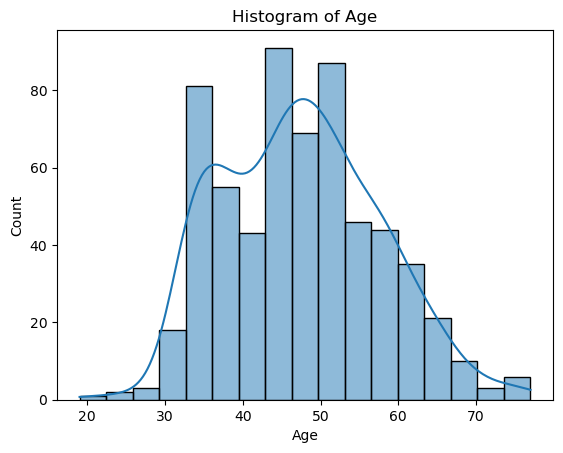

In [7]:
sns.histplot(data=df, x="Age", kde=True)
plt.title('Histogram of Age')

plt.show()


In this histogram we use in x axis the age and in y axis the frequency. We can see that the most common age is between 35 and 50 years old.

/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


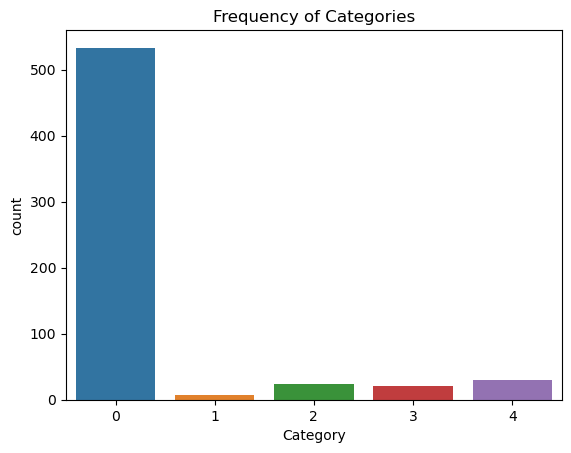

In [8]:
sns.countplot(data=df, x="Category")
plt.title('Frequency of Categories')
plt.show()


This barplot show us the frequency of each category. We can see that the category 0 (Blood Donor) is the most common.

([<matplotlib.patches.Wedge at 0x7fb9fe738dd0>,
 [Text(-0.39301764489282254, 1.0273933671203546, 'Masculine'),
  Text(0.39301754870131156, -1.0273934039173176, 'Feminine')],
 [Text(-0.21437326085063044, 0.5603963820656478, '61.6%'),
  Text(0.21437320838253354, -0.5603964021367186, '38.4%')])

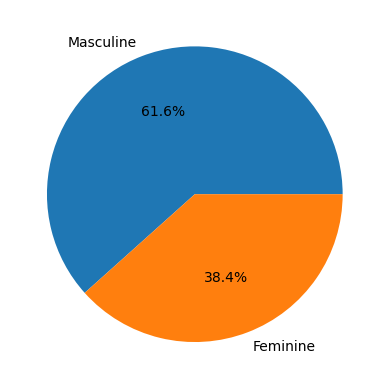

In [9]:
masculine = df[df['Sex'] == 'm']
amount_masculine = masculine.value_counts().sum()

feminine = df[df['Sex'] == 'f']
amount_feminine = feminine.value_counts().sum()

plt.pie([amount_masculine, amount_feminine], labels=['Masculine', 'Feminine'], autopct='%1.1f%%')

This pie plot show the distribution of the genders. The most is masculine.

/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

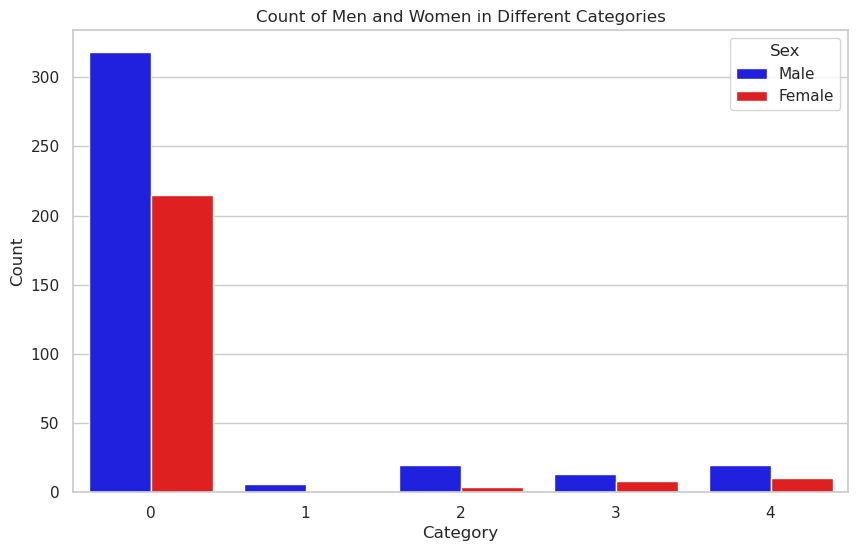

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Category", hue="Sex", palette={"m": "blue", "f": "red"})

plt.title("Count of Men and Women in Different Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title="Sex", labels=["Male", "Female"])
plt.show()

This bar plot show us the frequency of category based on the gender.

## Step 2: Define and fix the training and testing sets;

Here we create a variable X to store the features and a variable y to store the target. We use the drop to remove the category column from the dataset and store in X. We use the category column and store in y.

Here we use the train_test_split to split the dataset in training and testing sets. We use the test_size to specify the size of the testing set. We use the random_state to specify the seed of the random number generator. We use the stratify to specify the target.

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df["Sex"] = 1 - label_encoder.fit_transform(df["Sex"])


In this step we use the LabelEncoder to encode the target. We use the fit_transform to fit the target and transform the target.

We encode the column Sex using the LabelEncoder, in sequency we subtract the transformed column to 1 to invert the values.

Now we have 0 representing the masculine and 1 representing the feminine.

In [12]:
df.fillna(df.mean(), inplace=True)

In sequency we handle with the missing values. The strategy here is to replace them to the mean of the column.

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop("Category", axis=1)
y = df["Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Lets take a look in this code:

```python
from sklearn.model_selection import train_test_split

X = df.drop("Category", axis=1)
y = df["Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

Lets look step by step

    First we import the train_test_split from sklearn.model_selection; We import this function to split the dataset in training and testing sets. We use the test_size to specify the size of the testing set. We use the random_state to specify the seed of the random number generator. We use the stratify to specify the target. The test size is in this case 0.2, that means that 20% of the dataset will be used to test the model and 80% will be used to train the model. The random_state is 42, that means that the random number generator will generate the same numbers. The stratify is the target, that means that the target will be balanced in the training and testing sets.

    In sequency we create a variable X, this variable will store only the features in the dataset, in otherwords this variable will have all columns but column Category. The axis = 1 means that we are dropping the column Category. 
    
    We create a variable y, this variable will store only the target in the dataset, in otherwords this variable only have the colum Category.

    In sequency we create 4 variables, let's look each one of them with care: 

        1. X_train stores the feature data for the training set. It is a subset of X and will be used to train  machine learning model. It contains all columns except the "Category" column, which is the target or label that i've trying to predict.

        2. `X_test`: This variable stores the feature data from the testing set. Like `X_train`, it includes all columns except the "Category" column, but for the testing set. It contains the features you will use to evaluate your model's performance.

        3. `y_train`: This variable stores the target data from the training set. In your code, it consists of the "Category" column for the training set. It represents the labels or categories that you are trying to predict based on the features in the training set.

        4. `y_test`: This variable stores the target data from the testing set. Like `y_train`, it consists of the "Category" column, but for the testing set. It represents the ground truth labels or categories for the testing set, which you will use to evaluate how well your model performs.

    In summary, `X_train` and `X_test` contain the feature data for the training and testing sets, respectively, while `y_train` and `y_test` contain the corresponding target data for the training and testing sets. These variables are used to split your dataset into separate training and testing sets for machine learning model training and evaluation.

In [14]:
from keras.utils import to_categorical
y_train_encoded = to_categorical(y_train, num_classes=12)
y_test_encoded = to_categorical(y_test, num_classes=12)

2023-11-01 16:43:50.697545: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-01 16:43:50.746836: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-01 16:43:50.984602: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-01 16:43:50.984664: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-01 16:43:50.985799: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

Here is the final step to fix the training and testing sets. Let's take a look in this code:

```python
from keras.utils import to_categorical
y_train_encoded = to_categorical(y_train, num_classes=12)
y_test_encoded = to_categorical(y_test, num_classes=12)
```

First we import the to_categorical from keras.utils. This function will encode the target. We use the fit_transform to fit the target and transform the target. The num_classes is the number of classes in the target.

Now we create a variable y_train_encoded to store the encoded target for the training set. We use the to_categorical to encode the target. We use the fit_transform to fit the target and transform the target. The num_classes is the number of classes in the target.

# Step 3 Vary the ANN parameters and evaluate the error in the training and test sets;

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


The step 3 is basically this:

```python

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

```

- First we import the StandardScaler from sklearn.preprocessing. This function will scale the data. We use the fit_transform to fit the data and transform the data. The fit_transform is used to fit the data and transform the data. The transform is used to transform the data.

- Now we create a variable scaler to store the StandardScaler. We use the StandardScaler to scale the data.

- Now we create a variable X_train_scaled to store the scaled training set. We use the scaler to scale the training set.

- Now we create a variable X_test_scaled to store the scaled testing set. We use the scaler to scale the testing set.

## Step 4 Evaluate the impact of the changes made to the parameters, in the previous step, on the performance of the ANN in the chosen problem.

In [16]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dense(5, activation='softmax')
])


2023-11-01 16:43:55.674352: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-01 16:43:55.675604: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Here we need to take a look with care. Let's take a look in this code:

```python

import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(128, activation='relu'),  # Hidden layer 1
    keras.layers.Dense(64, activation='relu'),   # Hidden layer 2
    keras.layers.Dense(5, activation='softmax')  # Output layer with 5 neurons (5 categories)
])

```

- First we import the tensorflow and keras. We use the keras to create the model. Te tensorflow is the backend of keras.

- Now we create a variable model to store the model. We use the Sequential to create the model. The Sequential is a linear stack of layers. We use the Input to create the input layer. The shape is the shape of the training set. We use the Dense to create the hidden layers. The first parameter is the number of neurons in the layer. The activation is the activation function of the layer. We use the softmax to create the output layer. The number of neurons is the number of categories.

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Now we compile the model using the compile function. Let's take a look in this code:

```python
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
```

- First we use the compile to compile the model. The loss is the loss function. The optimizer is the optimizer function. The metrics is the metrics function. We use the categorical_crossentropy because we have more than 2 categories. We use the adam because it is a good optimizer. We use the accuracy because it is a good metrics.

In [18]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, activation='softmax'))  
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train_scaled, y_train_encoded, epochs=200, batch_size=32, validation_data=(X_test_scaled, y_test_encoded))


Epoch 1/200


16/16 [==============================] - 1s 28ms/step - loss: 2.7191 - accuracy: 0.1199 - val_loss: 2.5708 - val_accuracy: 0.1951
Epoch 2/200
16/16 [==============================] - 0s 8ms/step - loss: 2.6583 - accuracy: 0.1524 - val_loss: 2.5150 - val_accuracy: 0.2114
Epoch 3/200
16/16 [==============================] - 0s 8ms/step - loss: 2.6013 - accuracy: 0.1728 - val_loss: 2.4634 - val_accuracy: 0.2276
Epoch 4/200
16/16 [==============================] - 0s 8ms/step - loss: 2.5456 - accuracy: 0.1972 - val_loss: 2.4141 - val_accuracy: 0.2602
Epoch 5/200
16/16 [==============================] - 0s 9ms/step - loss: 2.4924 - accuracy: 0.2175 - val_loss: 2.3660 - val_accuracy: 0.2602
Epoch 6/200
16/16 [==============================] - 0s 9ms/step - loss: 2.4402 - accuracy: 0.2581 - val_loss: 2.3189 - val_accuracy: 0.2846
Epoch 7/200
16/16 [==============================] - 0s 8ms/step - loss: 2.3899 - accuracy: 0.2846 - val_loss: 2.2729 - val_accuracy: 0.2927
Epoch 8/200
16/16 [=====

Let's take a look in this code:

```python

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, activation='softmax'))  # Output layer with 12 units for 12 classes
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train_scaled, y_train_encoded, epochs=200, batch_size=32, validation_data=(X_test_scaled, y_test_encoded))

```

- First we import the Sequential and Dense from keras.models. We use the Sequential to create the model. The Sequential is a linear stack of layers. We use the Dense to create the output layer.

- In sequence we create a instance of the model. 

- Then we add to the model the output layer. We use the Dense to create the output layer. The first parameter is the number of neurons in the layer. The activation is the activation function of the layer. We use the softmax to create the output layer. The number of neurons is the number of categories.

- In sequence we compile the model. We use the compile to compile the model. The loss is the loss function. The optimizer is the optimizer function. The metrics is the metrics function. We use the categorical_crossentropy because we have more than 2 categories. We use the adam because it is a good optimizer. We use the accuracy because it is a good metrics.

- In sequence we create a variable history to store the history of the model. We use the fit to fit the model. The X_train_scaled is the training set. The y_train_encoded is the encoded target for the training set. The epochs is the number of epochs. The batch_size is the batch size. The validation_data is the validation set.



In [19]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


4/4 [==============================] - 0s 3ms/step - loss: 0.3719 - accuracy: 0.8618
Test Loss: 0.3719015121459961, Test Accuracy: 0.8617886304855347


And finally the results:

```python
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
```

- First we create two variables to store the loss and the accuracy. We use the evaluate to evaluate the model. The X_test_scaled is the testing set. The y_test_encoded is the encoded target for the testing set.

- In sequence we print the results.

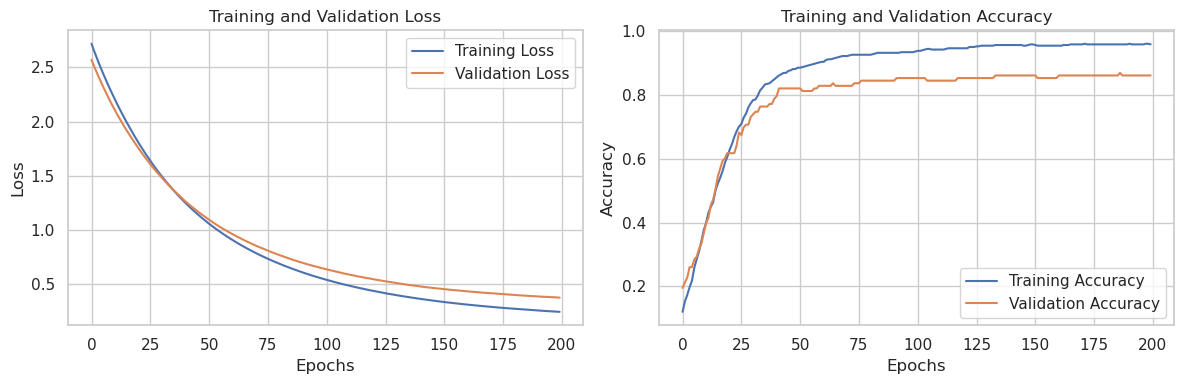

In [20]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In end we just generate a plot of the loss and accuracy.

```python

train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

```

- First we create 4 variables to store the loss and accuracy. We use the history to get the loss and accuracy. The train_loss is the loss of the training set. The val_loss is the loss of the validation set. The train_acc is the accuracy of the training set. The val_acc is the accuracy of the validation set.

- In sequence we create a plot to show the loss and accuracy.



## Conclusion

In the first step we can see visually the relationship between the variables and the category. We can see that the category 0 (Blood Donor) is the most common. We can see that the most common age is between 35 and 50 years old. We can see that the most is masculine.

In the second step we define and fix the training and testing sets it was necessary some adjusts like change the column 'Sex' because the column was a string and we need to convert to a number. We also need to handle with the missing values. The strategy here is to replace them to the mean of the column.

The step 3 was very clear and simple, we just need to scale the data.

And the last step was to create the model and train the model.

The number of epochs inital was 50, but after some changes i decided to increase the number of epochs to 200. After the increase the accuracy of the model has increased 5% aproximately. The accuracy of the model now is 86% aproximately. The reason why i don't increase even more the number of epochs is because the model is overfitting.

After the analyse of the results i can say that the model is actually good and can be used to predict if a patient is healthy (hepatitis negative) or if the patient has hepatitis (hepatitis positive) based on the laboratory data. Of course there are some cases that the model can't predict, but in general the model is good.